In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50, InceptionV3, MobileNetV2, Xception
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess, decode_predictions as resnet_decode
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess, decode_predictions as inception_decode
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess, decode_predictions as mobilenet_decode
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess, decode_predictions as xception_decode

# Шлях до папки з вашими зображеннями
image_folder = 'l4img/'  # Можете змінити шлях до ваших зображень

# Отримання всіх зображень з папки
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Функція для підготовки зображення
def prepare_image(img_path, target_size, preprocess_function):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_function(img_array)

# Функція для відображення зображень та результатів
def display_predictions(image_path, predictions, model_name):
    img = image.load_img(image_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'{model_name} Predictions')
    plt.show()
    for pred in predictions:
        print(f"{pred[1]}: {pred[2]*100:.2f}%")
    print('-----------------------------------')


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 27s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


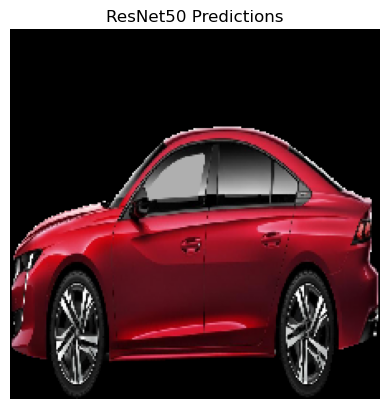

car_wheel: 45.06%
sports_car: 28.33%
grille: 14.89%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


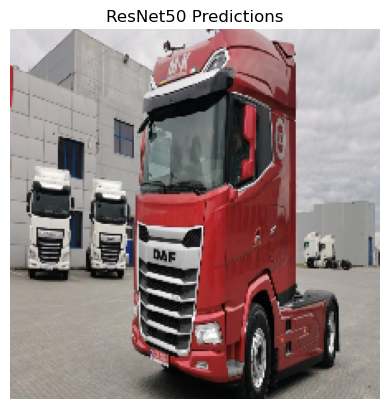

trailer_truck: 67.63%
moving_van: 13.05%
forklift: 5.28%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


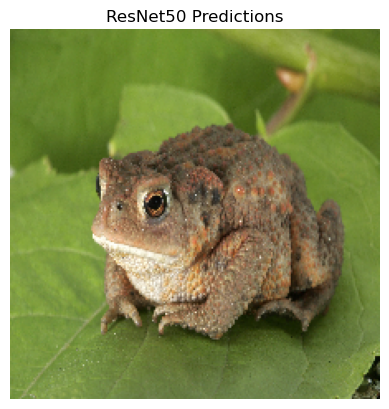

tailed_frog: 96.61%
tree_frog: 2.18%
African_chameleon: 0.23%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


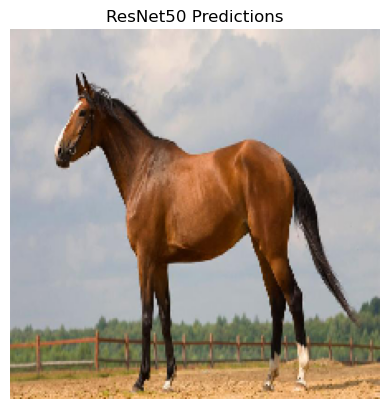

sorrel: 65.14%
hartebeest: 34.68%
impala: 0.07%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


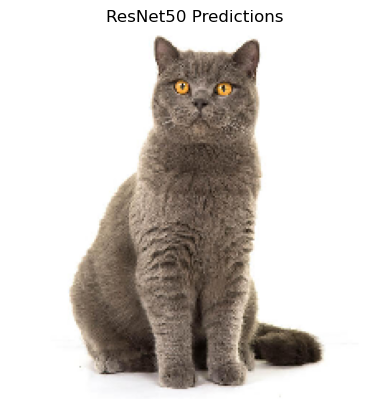

Egyptian_cat: 51.35%
tabby: 24.63%
Persian_cat: 8.46%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


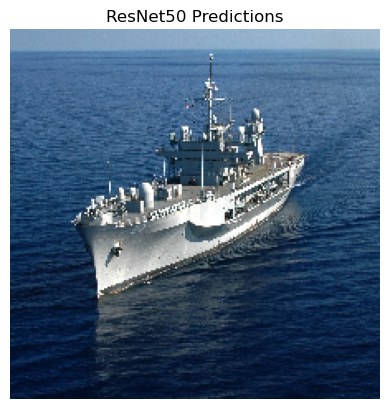

liner: 41.41%
aircraft_carrier: 29.22%
dock: 9.68%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


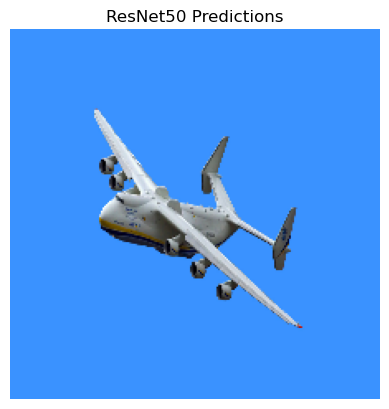

warplane: 63.92%
wing: 24.86%
airliner: 10.35%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


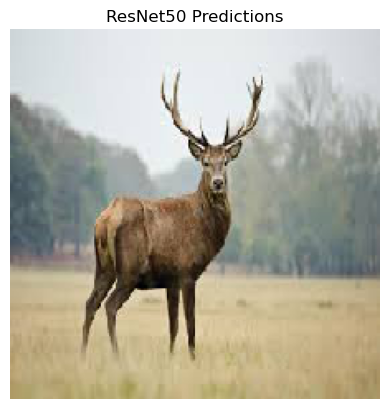

hartebeest: 86.30%
ibex: 10.98%
bighorn: 0.95%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


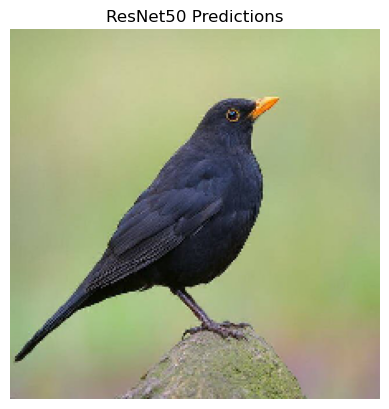

water_ouzel: 50.61%
robin: 10.01%
magpie: 5.39%
-----------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


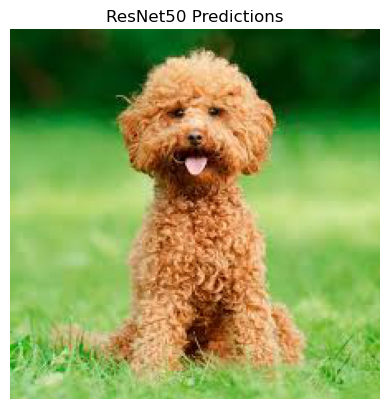

miniature_poodle: 79.93%
toy_poodle: 15.77%
standard_poodle: 3.41%
-----------------------------------


In [3]:
# Завантаження моделі ResNet50
model_resnet = ResNet50(weights='imagenet')

# Розпізнаємо зображення за допомогою ResNet50
for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)
    prepared_img = prepare_image(img_path, target_size=(224, 224), preprocess_function=resnet_preprocess)
    
    # Передбачення
    predictions = model_resnet.predict(prepared_img)
    
    # Декодуємо передбачення
    decoded_predictions = resnet_decode(predictions, top=3)[0]
    
    # Відображаємо зображення та результат
    display_predictions(img_path, decoded_predictions, "ResNet50")